In [15]:
import sys
import pandas as pd
import joblib
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sys.path.append("..") # adds twitter_sentiment path

In [3]:
from twitter_sentiment.preprocessors.utils import read_jsonlines_lzma
from twitter_sentiment.preprocessors.distant_supervision import extract_tweets_tokenized_text_and_Y

In [11]:
distant_dataset = "../data/output/all_deduplicated-pt-tagged.jsonline.xz"
tweets = read_jsonlines_lzma(distant_dataset)
_, X, Y = extract_tweets_tokenized_text_and_Y(tweets)

In [71]:
seq_len = np.array([len(x) for x in X])

In [72]:
len(set(seq_len))

167

In [125]:
plt.rcParams.update({'font.size': 18})

In [137]:
threshold = int(np.percentile(seq_len, 95))

In [138]:
threshold

42

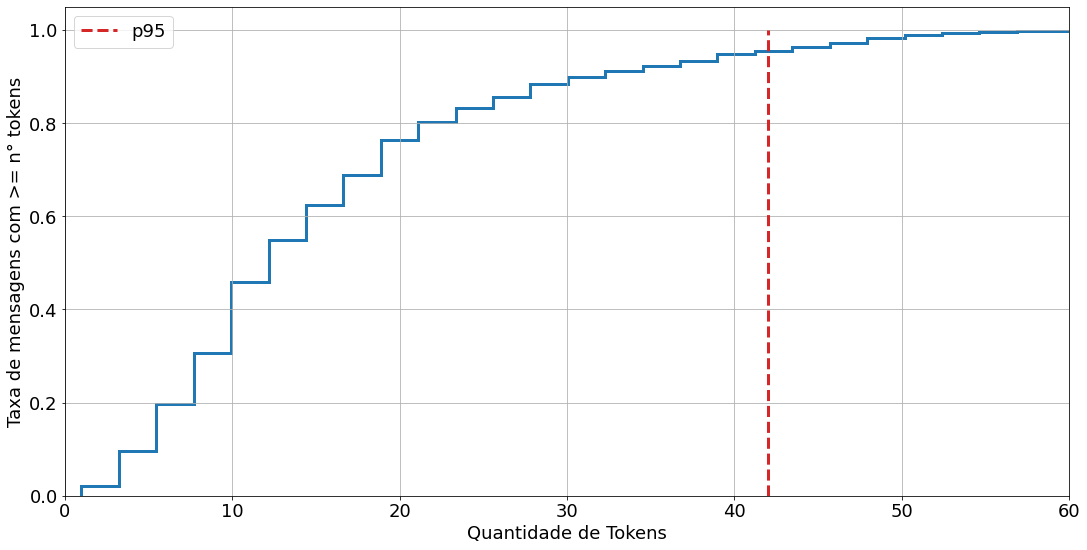

In [136]:
plt.figure(figsize=(18,9))
plt.hist(seq_len, bins=200, density=True, cumulative=True, label='', linewidth=3, histtype='step', color='#1f77b4')
plt.vlines(int(np.percentile(seq_len, 95)), ymin=0, ymax=1, linewidth=3, linestyles='dashed', label='p95', colors='#d62728')
plt.xlim((0, 60))
plt.legend(loc='upper left')
plt.xlabel("Quantidade de Tokens")
plt.ylabel("Taxa de mensagens com >= n° tokens")
plt.grid(which="both")
plt.show()